In [1]:
# Lab 10 MNIST and NN
import numpy as np
import random
import tensorflow as tf

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 10 #100 reduce batch_size
training_epochs = 15
nb_classes = 10
drop_rate = 0.3

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [5]:
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

In [7]:
model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

In [8]:
model.add(tf.keras.layers.Dense(input_dim=784, units=512, kernel_initializer='glorot_normal', activation='relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
model.add(tf.keras.layers.Dropout(drop_rate))
model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2

In [11]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/15
6000/6000 [==============================] - 61s 10ms/step - loss: 1.3980 - accuracy: 0.7952
Epoch 2/15
6000/6000 [==============================] - 69s 12ms/step - loss: 0.7447 - accuracy: 0.8328
Epoch 3/15
6000/6000 [==============================] - 71s 12ms/step - loss: 0.7982 - accuracy: 0.8196
Epoch 4/15
6000/6000 [==============================] - 71s 12ms/step - loss: 0.9035 - accuracy: 0.7979
Epoch 5/15
6000/6000 [==============================] - 71s 12ms/step - loss: 1.0383 - accuracy: 0.7698
Epoch 6/15
6000/6000 [==============================] - 71s 12ms/step - loss: 1.2309 - accuracy: 0.7109
Epoch 7/15
6000/6000 [==============================] - 72s 12ms/step - loss: 1.3868 - accuracy: 0.6541
Epoch 8/15
6000/6000 [==============================] - 68s 11ms/step - loss: 1.6876 - accuracy: 0.5790
Epoch 9/15
6000/6000 [==============================] - 59s 10ms/step - loss: 1.8404 - accuracy: 0.4607
Epoch 10/15
6000/6000 [==============================] - 62s 10m

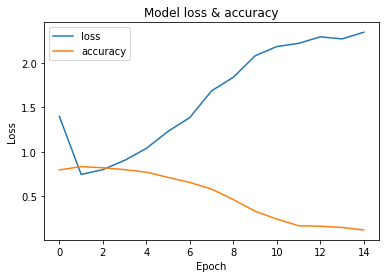

[0.24105000495910645, 0.1657833307981491, 0.16015000641345978, 0.14638333022594452, 0.11851666867733002]


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
print(history.history['accuracy'][-5:])

In [14]:
# predict 10 random hand-writing data
y_predicted = model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,"actual y: ", np.argmax(y_test[random_index]),"predicted y: ", np.argmax(y_predicted[random_index]))

index:  3757 actual y:  8 predicted y:  7
index:  7304 actual y:  5 predicted y:  7
index:  7300 actual y:  7 predicted y:  7
index:  6039 actual y:  9 predicted y:  7
index:  9429 actual y:  3 predicted y:  7
index:  4420 actual y:  5 predicted y:  7
index:  5507 actual y:  2 predicted y:  7
index:  8809 actual y:  1 predicted y:  7
index:  654 actual y:  5 predicted y:  7
index:  7302 actual y:  8 predicted y:  7


In [15]:
# evaluate test set
evaluation = model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.2986 - accuracy: 0.1043
loss:  2.2986223697662354
accuracy 0.10429999977350235
